# Персонализированные предложения для клиентов интернет-магазина «В один клик» #

## Описание проекта ##

В рамках данного проекта необходимо разработать стратегию удержания постоянных клиентов для интернет-магазина "В один клик", который занимается продажей различных товаров: для детей, дома, мелкой бытовой техники, косметики, продуктов и так далее.  
Анализ данных показал, что активность покупателей начинает снижаться, а привлечение новых клиентов становится менее эффективным, учитывая высокую осведомленность целевой аудитории о магазин. Поэтому руководство отнеслось к данной проблеме отвествненно, рассчитыва на опомощю анализа данных и бизнес-моделировани. Нужно сохранить покупателей с помощью предложений для клиентов различных сегментов. Всем нельзя делать выгоду, ведь это попросту не выгодно компани.. Для этого они решили обратиться в отдел цифровых технологий. Цель проекта заключается в создании персонализированных предложени в ближайшее времяй для постоянных клиентов с целью повышения их покупательской активности Это можно сделать с помощью модели предсказания покупательской активности.  
 Основные этапы руководитель отдела уже сформировал:  
Нужно промаркировать уровень финансовой активности постоянных покупателей  
Собрать данные по клиентам по следующим группам:
- Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
- Признаки, которые описывают продуктовое поведение покупателя.
- Признаки, которые описывают покупательское поведение клиента.
- Признаки, которые описывают поведение покупателя на сайте.

## Описание данных

Дано 4 таблицы  

market_file - таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении  
- id — номер покупателя в к/орпоративной базе данных  
- Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень»  
- Тип сервиса — уровень сервиса, например «премиум» и «стандарт»  
- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель  
- Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента  
- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце  
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте  
- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев  
- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев  
- Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца  
- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца  
- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта  
- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца  

market_money - таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом  
- id — номер покупателя в корпоративной базе данных  
- Период — название периода, во время которого зафиксирована выручка  
- Выручка — сумма выручки за период  

market_time - Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода  
- id — номер покупателя в корпоративной базе данных  
- Период — название периода, во время которого зафиксировано общее время  
- минут — значение времени, проведённого на сайте, в минутах

money - Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю  
- id — номер покупателя в корпоративной базе данных  
- Прибыль — значение прибыли

## Задача проекта

Помочь сохранить интернет-магазину "В один клик" сохранить клиентов с помощью разработанной модели для предсказания вероятности снижения покупательской активности и с помощью предложений, сформированных на данных, для выгодных персональных предложений клиентам

## Установка и импорт библиотек

Устанавливаем нужные библиотеки

In [5]:
!pip install pandas
!pip install seaborn
!pip install scipy
!pip install scikit-learn
!pip show numpy
!pip install optuna
!pip install optuna-integration
!pip install shap
!pip install -U scikit-learn

Name: numpy
Version: 1.21.1
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: /opt/conda/lib/python3.9/site-packages
Requires: 
Required-by: xgboost, transformers, thinc, tensorflow-cpu, tensorboard, statsmodels, spacy, shap, seaborn, scipy, scikit-learn, pyod, pyarrow, patsy, pandas, optuna, opt-einsum, numba, matplotlib, lightgbm, Keras-Preprocessing, h5py, gensim, folium, catboost, blis


Импортируем все необходимые для работы библиотеки

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kendalltau
from sklearn.model_selection import train_test_split
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# При использовании пайплайнов
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from optuna.integration import OptunaSearchCV
from sklearn.metrics import f1_score
import shap

Функции, используемые в проекте

In [7]:
# Вывод различной информации о таблице
def pass_dupl(df):
    df.info()
    print()
    display(df.isna().sum())
    print()
    print('Кол-во дубликатов в таблице')
    display(df.duplicated().count())
    print()
    print()

In [8]:
# вывод для анализа категориальных признаков
def kategory_analiz(table):
    print('тип сервиса')
    print('стандарт - ', len(table.query('`тип сервиса` == "стандарт"')))
    print('премиум - ', len(table.query('`тип сервиса` == "премиум"')))
    # Посмотрим на соотношение, чтобы потом сравнить с результатами другой таблицы
    print('отношение - ',(len(table.query('`тип сервиса` == "премиум"'))) / (len(table.query('`тип сервиса` == "стандарт"'))))
    print()
    print('разрешить сообщать')
    print('True - ', len(table.query('`разрешить сообщать` == True')))
    print('False - ', len(table.query('`разрешить сообщать` == False')))
    print('отношение - ',(len(table.query('`разрешить сообщать` == False'))) / (len(table.query('`разрешить сообщать` == True'))))
    print()
    print('популярная категория')
    print('Мелкая бытовая техника и электроника - ', len(table.query('`популярная категория` == "Мелкая бытовая техника и электроника"')))
    print('Товары для детей',len(table.query('`популярная категория` == "Товары для детей"')))
    print('Техника для красоты и здоровья',len(table.query('`популярная категория` == "Техника для красоты и здоровья"')))
    print('Косметика и аксесуары',len(table.query('`популярная категория` == "Косметика и аксесуары"')))
    print('Кухонная посуда',len(table.query('`популярная категория` == "Кухонная посуда"')))
    print('Домашний текстиль',len(table.query('`популярная категория` == "Домашний текстиль"')))

##  Загрузка данных

Для начала загрузим данные 

In [9]:
try:
    market = pd.read_csv('market_file.csv')
    display(market.head())

    market_money = pd.read_csv('market_money.csv')
    display(market_money.head())

    market_time = pd.read_csv('market_time.csv')
    display(market_time.head())

    money = pd.read_csv('money.csv')
    display(money.head())

except:
    market = pd.read_csv('/datasets/market_file.csv')
    display(market.head())

    market_money = pd.read_csv('/datasets/market_money.csv')
    display(market_money.head())

    market_time = pd.read_csv('/datasets/market_time.csv')
    display(market_time.head())

    money = pd.read_csv('/datasets/money.csv')
    display(money.head())

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


,Unnamed: 0,id;Прибыль
0,215348;0,98.0
1,215349;4,16.0
2,215350;3,13.0
3,215351;4,87.0
4,215352;4,21.0


В таблице money нужно разделить столбцы по ";". У десятичных чисел заменить "," на "." и ".0" на ничего

In [10]:
try:
    money = pd.read_csv('money.csv', sep=';', decimal=',')
    money['Прибыль'] = money['Прибыль'].str.replace(',', '.', regex=False).str.replace('.0', '', regex=False)
    money.columns = ['id', 'Прибыль']
    display(money.head())
except:
    money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')
    display(money.head())
    display(money.head())

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


На первый взгляд, данные соответствуют предоставленному нам описанию 

## Предобработка данных

Для начала переименуем столбцы и приведем их к нижнему регистру у таблицы market, где заменим _ на пробелы.  
В таблицах market_money и market_time поменяем _ тоже на пробелы 

In [11]:
market.columns = market.columns.str.lower()
market.columns = market.columns.str.replace('_', ' ')
print(market.columns)

market_money.columns = market_money.columns.str.lower()
market_money['период'] = market_money['период'].str.replace('_', ' ')
display(market_money.head())

market_time.columns = market_time.columns.str.lower()
market_time['период'] = market_time['период'].str.replace('_', ' ')
display(market_time.head())

money.columns = money.columns.str.lower()

Index(['id', 'покупательская активность', 'тип сервиса', 'разрешить сообщать',
       'маркет актив 6 мес', 'маркет актив тек мес', 'длительность',
       'акционные покупки', 'популярная категория',
       'средний просмотр категорий за визит',
       'неоплаченные продукты штук квартал', 'ошибка сервиса',
       'страниц за визит'],
      dtype='object')


,id,период,выручка
0,215348,препредыдущий месяц,0.0
1,215348,текущий месяц,3293.1
2,215348,предыдущий месяц,0.0
3,215349,препредыдущий месяц,4472.0
4,215349,текущий месяц,4971.6


,id,период,минут
0,215348,текущий месяц,14
1,215348,предыдцщий месяц,13
2,215349,текущий месяц,10
3,215349,предыдцщий месяц,12
4,215350,текущий месяц,13


Good job!

Посмотрим на пропуски, дубликаты и общую информацию о таблиах. Для этого напишем функцию для поиска кол-ва пропусков и дубликатов, чтобы не писать 4 раза одно и то же.

In [12]:
print(pass_dupl(market))
print(pass_dupl(market_money))
print(pass_dupl(market_time))
print(pass_dupl(money))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская активность            1300 non-null   object 
 2   тип сервиса                          1300 non-null   object 
 3   разрешить сообщать                   1300 non-null   object 
 4   маркет актив 6 мес                   1300 non-null   float64
 5   маркет актив тек мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные покупки                    1300 non-null   float64
 8   популярная категория                 1300 non-null   object 
 9   средний просмотр категорий за визит  1300 non-null   int64  
 10  неоплаченные продукты штук квартал   1300 non-null   int64  
 11  ошибка сервиса                

id                                     0
покупательская активность              0
тип сервиса                            0
разрешить сообщать                     0
маркет актив 6 мес                     0
маркет актив тек мес                   0
длительность                           0
акционные покупки                      0
популярная категория                   0
средний просмотр категорий за визит    0
неоплаченные продукты штук квартал     0
ошибка сервиса                         0
страниц за визит                       0
dtype: int64


Кол-во дубликатов в таблице


1300



None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB



id         0
период     0
выручка    0
dtype: int64


Кол-во дубликатов в таблице


3900



None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB



id        0
период    0
минут     0
dtype: int64


Кол-во дубликатов в таблице


2600



None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1300 non-null   int64 
 1   прибыль  1300 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.4+ KB



id         0
прибыль    0
dtype: int64


Кол-во дубликатов в таблице


1300



None


Изменим тип данных у столбца "Разрешить сообщать" таблицы market на bool. В таблице money поменяем тип данных у "прибыль" на float

In [13]:
market['разрешить сообщать'] = (market['разрешить сообщать'] == 'да').astype(bool)
display(market.head())
money['прибыль'] = pd.to_numeric(money['прибыль'], errors = 'raise')

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,популярная категория,средний просмотр категорий за визит,неоплаченные продукты штук квартал,ошибка сервиса,страниц за визит
0,215348,Снизилась,премиум,True,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,True,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,False,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,True,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,False,5.1,3,1064,0.94,Товары для детей,3,2,3,2


В каждой таблице не оказалось пропусков, в отличие от дубликатов. Избавимся от ниx

In [14]:
market = market.drop_duplicates()
market_money = market_money.drop_duplicates()
market_time = market_time.drop_duplicates()
money = money.drop_duplicates()

Теперь проверим данные на неявные дубликаты. Это будут столбцы, в которых могла произойти опечатка

In [15]:
print(market['покупательская активность'].unique())
print()
print(market['тип сервиса'].unique())
print()
print(market['популярная категория'].unique())
print()
print(market_money['период'].unique())
print()
print(market_time['период'].unique())

['Снизилась' 'Прежний уровень']

['премиум' 'стандартт' 'стандарт']

['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']

['препредыдущий месяц' 'текущий месяц' 'предыдущий месяц']

['текущий месяц' 'предыдцщий месяц']


Тут есть над чем поработать. Заменим в таблице market в столбике 'тип сервиса' значения 'стандартт' на 'стандарт'. И в market_time 'предыдцщий месяц' на 'предыдущий месяц'

In [16]:
market['тип сервиса'] = market['тип сервиса'].str.replace('стандартт', 'стандарт')
market_time['период'] = market_time['период'].str.replace('предыдцщий месяц', 'предыдущий месяц')

**На данном этапе мы обработали виды таблиц, чтобы с ними было удобнее работать, изменив названия столбцов, некоторые значения. Затем избавились от различных дубликатов, поменяли типы у некоторых данных**

## Исследовательский анализ данных

Проведем статистический анализ всех признаков, проверим данные на выбросы, отберем клиентов с покупательской активностью не менее трёх месяцев

Посмотрим на количественныен данные

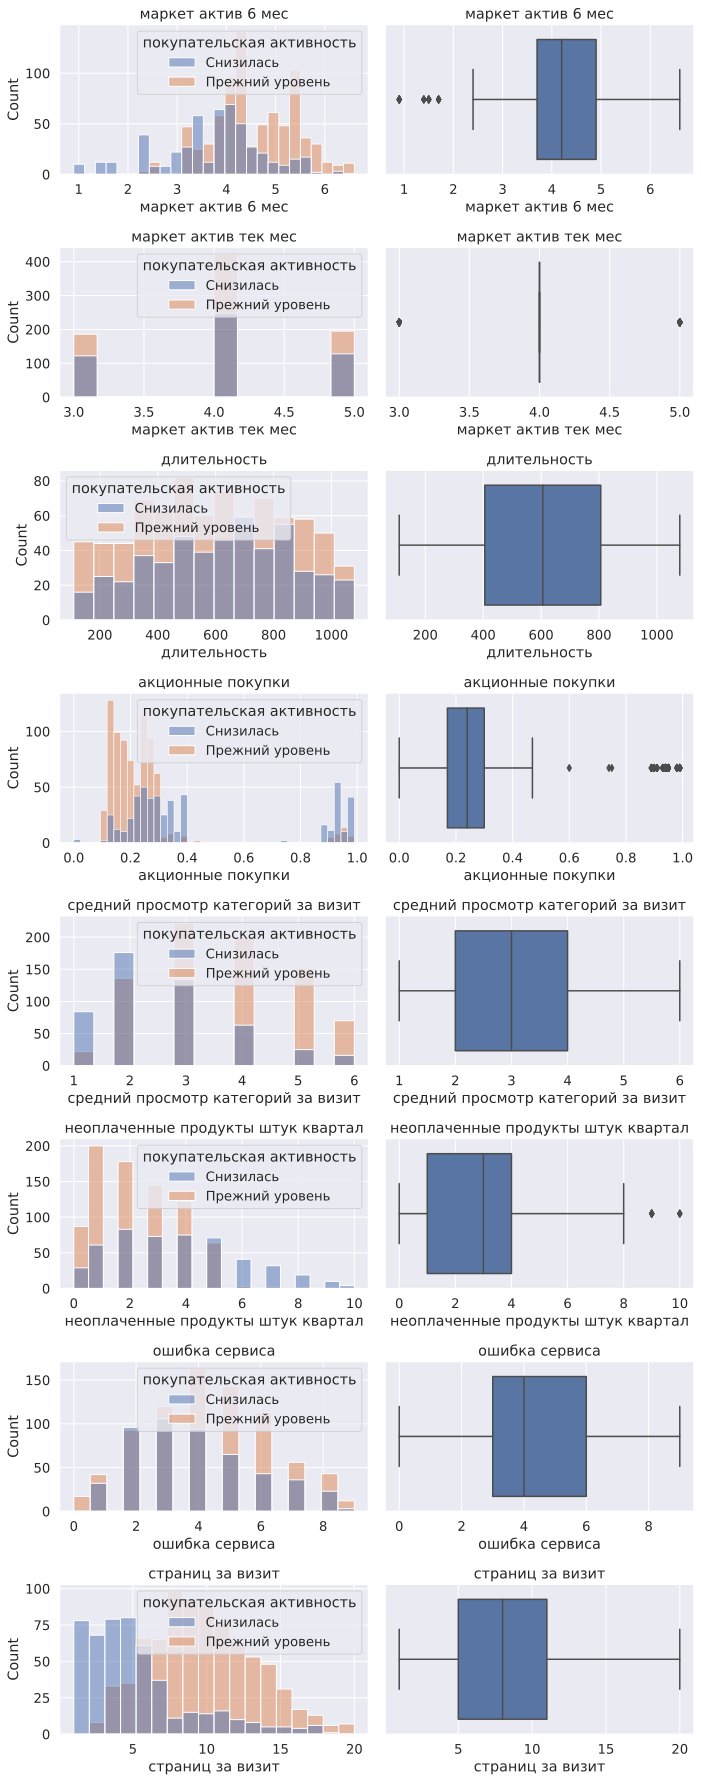

In [17]:
sns.set(font_scale=1.2)
numerical_columns = market.select_dtypes(include='number').drop('id', axis=1).columns
fig, axs = plt.subplots(len(numerical_columns), 2, figsize=(10, 25))

for i in range(len(numerical_columns)):
    column = numerical_columns[i]
    #sns.histplot(market[column], hue='тип сервиса', ax=axs[i, 0])
    sns.histplot(data=market, x=column, hue='покупательская активность', ax=axs[i, 0])
    axs[i, 0].set_title(column)
    
    sns.boxplot(x=market[column], ax=axs[i, 1])
    axs[i, 1].set_title(column)

plt.tight_layout()
plt.show()

Заметных выбросов не наблюдается, кроме гистограммы по маркет актив тек мес. У него наблюдается всего три столбца, видимо, он имеет всего 3 значения. Проверим это

In [18]:
market['маркет актив тек мес'].unique()

array([5, 4, 3])

Запомним этот момент, т.к. данный столбец можно будет использовать для улучшения модели, как категориальный признак

Проверим отсальные данные, которые не вошли в гистограммы

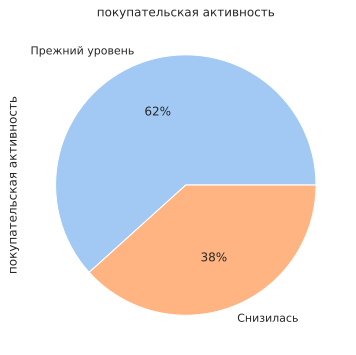

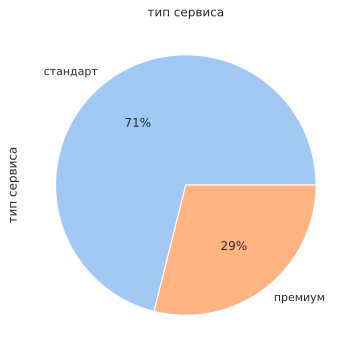

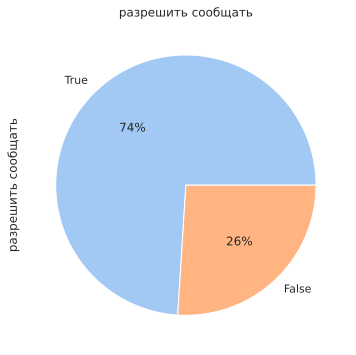

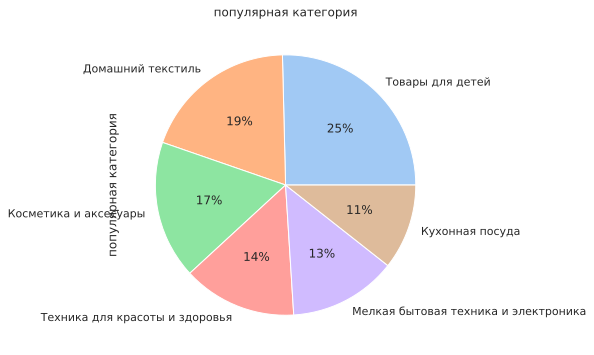

In [19]:
sns.set(style="whitegrid")
sns.set_palette("pastel")
kategory_col = ['покупательская активность', 'тип сервиса', 'разрешить сообщать', 'популярная категория']
for column in kategory_col:
    plt.figure(figsize=(6, 6))
    market[column].value_counts().plot(kind='pie', autopct='%1.0f%%')
    plt.title(column)
    plt.show()

Тоже нет ничего особенного

Посмотрим на таблицу market_money. В ней только один столбец может оказаться с выбросами. Проверим его

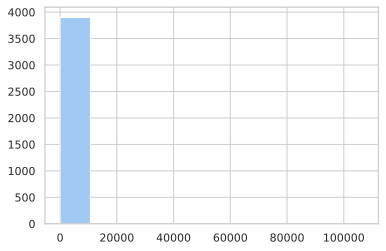

In [20]:
market_money['выручка'].hist();

Вот он - выброс

In [21]:
market_money[market_money['выручка'] > 20000]

,id,период,выручка
98,215380,текущий месяц,106862.2


In [22]:
market_money['выручка'].median()

4957.5

Медианное значение около 5 тысяч. Даже если наш выброс поделить на 10, ссылаясь на ошибку с разрядом, то получится достаточно большое значение. Можно подумать, что это клиент совершил крупную покупку, но это странно, т.к. таких покупок из 3900 больше нет. Лучше просто удалить данный id из всех таблиц

In [23]:
market['id']

0       215348
1       215349
2       215350
3       215351
4       215352
         ...  
1295    216643
1296    216644
1297    216645
1298    216646
1299    216647
Name: id, Length: 1300, dtype: int64

In [24]:
print(len(market_money['выручка']))
market_money = market_money[market_money['id'] != 215380]
print(len(market_money['выручка'])) # убедимся, что удалились столбики

market = market[market['id'] != 215380]
market_time = market_time[market_time['id'] != 215380]
money = money[money['id'] != 215380]

3900
3897


Теперь посмотри на столбец "минут" в таблице market_time

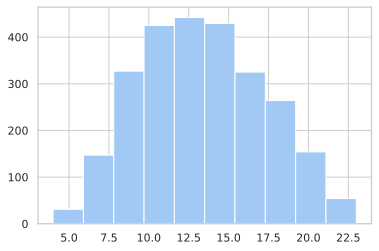

In [25]:
market_time['минут'].hist();

Нормально (во всех смыслах слова так сказать)

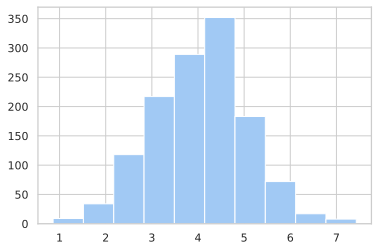

In [26]:
money['прибыль'].hist();

In [27]:
money['прибыль'].median()

4.12

Какие-то странные значения у столбца прибыль, видимо, они записаны в процентах. Нужно уточнить эту информацию у тех, кто предоставил данные о выручке и прибыли, но по данной гистограмме выбросов не видно

Отберем клиентов, которые хоть раз что-то покупали за последние три месяца

In [28]:
market_money_month = pd.pivot_table(market_money, index='id', columns='период', values='выручка')
market_money_month.head()

период,предыдущий месяц,препредыдущий месяц,текущий месяц
id,,,
215348,0.0,0.0,3293.1
215349,5216.0,4472.0,4971.6
215350,5457.5,4826.0,5058.4
215351,6158.0,4793.0,6610.4
215352,5807.5,4594.0,5872.5


In [29]:
market_money_month = market_money_month[(market_money_month['предыдущий месяц'] > 0) & (market_money_month['препредыдущий месяц'] > 0) & (market_money_month['текущий месяц'] > 0)]
market_money_month.head()

период,предыдущий месяц,препредыдущий месяц,текущий месяц
id,,,
215349,5216.0,4472.0,4971.6
215350,5457.5,4826.0,5058.4
215351,6158.0,4793.0,6610.4
215352,5807.5,4594.0,5872.5
215353,4738.5,5124.0,5388.5


Нашлось 33 пользователя, которые за последние три месяца подряд не проявили активности

На данном шаге мы мы провели исследовательский анализ данных из каждой таблицы. Изучили все данные на наличие различных выбросов. В таблице market_money столбец 'выручка' оказался с достаточно спорным выбросом, который пришлось убрать, на всякий случай. Было замечено достаточно странное измерение прибыли в процентах. В конце шага отобрали клиентов с покупательской активностью не менее трёх месяцев. Такими оказались все клиенты, кроме 33

##  Объединение таблиц

На данном этапе мы объединим первые три таблицы: market, market_money, market_time. В итоге должна получиться таблица со всеми столбцами и раздельными месяцами

Сначала разберемся с таблицей market_time, т.к. она похожа на market_money

In [30]:
market_time.head()

,id,период,минут
0,215348,текущий месяц,14
1,215348,предыдущий месяц,13
2,215349,текущий месяц,10
3,215349,предыдущий месяц,12
4,215350,текущий месяц,13


Будем соединять таблицы по id именно у market_money, т.к. в ней уже отобраны id активных пользователей, которые нам нужны

In [31]:
market_time_month = pd.pivot_table(market_time, index='id', columns='период', values='минут')
market_time_month.head()

период,предыдущий месяц,текущий месяц
id,,
215348,13,14
215349,12,10
215350,8,13
215351,11,13
215352,8,11


Попробуем объединить две таблицы

In [32]:
market_time_month = market_time_month.reset_index()
# сразу поменяем названия столбцов, чтобы потом не заморачиваться с этим
market_time_month.columns = ['id', 'время за предыдущий месяц', 'время за текущий месяц']
market_time_month.head()

,id,время за предыдущий месяц,время за текущий месяц
0,215348,13,14
1,215349,12,10
2,215350,8,13
3,215351,11,13
4,215352,8,11


In [33]:
market_money_month = market_money_month.reset_index()
market_money_month.columns = ['id', 'выручка за предыдущий месяц', 'выручка за препредыдущий месяц', 'выручка за текущий месяц']


In [34]:
market_qeneral = market_money_month.merge(market_time_month, on = 'id', how = 'left')
market_qeneral.head()

,id,выручка за предыдущий месяц,выручка за препредыдущий месяц,выручка за текущий месяц,время за предыдущий месяц,время за текущий месяц
0,215349,5216.0,4472.0,4971.6,12,10
1,215350,5457.5,4826.0,5058.4,8,13
2,215351,6158.0,4793.0,6610.4,11,13
3,215352,5807.5,4594.0,5872.5,8,11
4,215353,4738.5,5124.0,5388.5,10,10


а теперь добавим к market_qeneral таблицу market

In [35]:
market_qeneral = market_qeneral.merge(market, on = 'id', how = 'left')
market_qeneral

,id,выручка за предыдущий месяц,выручка за препредыдущий месяц,выручка за текущий месяц,время за предыдущий месяц,время за текущий месяц,покупательская активность,тип сервиса,разрешить сообщать,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,популярная категория,средний просмотр категорий за визит,неоплаченные продукты штук квартал,ошибка сервиса,страниц за визит
0,215349,5216.0,4472.0,4971.6,12,10,Снизилась,премиум,True,4.4,4,819,0.75,Товары для детей,4,4,2,5
1,215350,5457.5,4826.0,5058.4,8,13,Снизилась,стандарт,False,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
2,215351,6158.0,4793.0,6610.4,11,13,Снизилась,стандарт,True,3.2,5,896,0.99,Товары для детей,5,0,6,4
3,215352,5807.5,4594.0,5872.5,8,11,Снизилась,стандарт,False,5.1,3,1064,0.94,Товары для детей,3,2,3,2
4,215353,4738.5,5124.0,5388.5,10,10,Снизилась,стандарт,True,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,216643,3664.0,4704.0,4741.7,14,7,Прежний уровень,стандарт,True,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11
1292,216644,4729.0,5299.0,5353.0,12,11,Прежний уровень,стандарт,False,5.1,4,454,0.21,Домашний текстиль,6,2,3,9
1293,216645,5160.0,5334.0,5139.2,12,18,Прежний уровень,стандарт,True,4.1,3,586,0.20,Домашний текстиль,3,2,5,7
1294,216646,4923.0,4725.0,5224.6,18,7,Прежний уровень,стандарт,True,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7


Лепота!

Подведем итог данного шага. Мы объединили между собой три таблицы market, market_money, market_time, где разделили столбцы, отвечающие за выручку и время, по месяцам.

## Корреляционный анализ

Нужно понять, как связаны между собой признаки. Если входные признаки будут сильно зависеть друг от друга, то один из них нужно будет удалить, чтобы модель не запуталась. Проверим значения корреляции по методу Спирмена

Для начала разберемся с количественными переменными. Для этого нужно их отобрать

In [36]:
market_qeneral.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   выручка за предыдущий месяц          1296 non-null   float64
 2   выручка за препредыдущий месяц       1296 non-null   float64
 3   выручка за текущий месяц             1296 non-null   float64
 4   время за предыдущий месяц            1296 non-null   int64  
 5   время за текущий месяц               1296 non-null   int64  
 6   покупательская активность            1296 non-null   object 
 7   тип сервиса                          1296 non-null   object 
 8   разрешить сообщать                   1296 non-null   bool   
 9   маркет актив 6 мес                   1296 non-null   float64
 10  маркет актив тек мес                 1296 non-null   int64  
 11  длительность                  

In [37]:
numeric_columns = market_qeneral.select_dtypes(include=['int64', 'float64']) # Отбираем количественные переменные это 'int64', 'float64'
numeric_columns.head()

,id,выручка за предыдущий месяц,выручка за препредыдущий месяц,выручка за текущий месяц,время за предыдущий месяц,время за текущий месяц,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,средний просмотр категорий за визит,неоплаченные продукты штук квартал,ошибка сервиса,страниц за визит
0,215349,5216.0,4472.0,4971.6,12,10,4.4,4,819,0.75,4,4,2,5
1,215350,5457.5,4826.0,5058.4,8,13,4.9,3,539,0.14,5,2,1,5
2,215351,6158.0,4793.0,6610.4,11,13,3.2,5,896,0.99,5,0,6,4
3,215352,5807.5,4594.0,5872.5,8,11,5.1,3,1064,0.94,3,2,3,2
4,215353,4738.5,5124.0,5388.5,10,10,3.3,4,762,0.26,4,1,1,4


In [38]:
numeric_columns = numeric_columns.set_index('id') # избавляемся от столбца id именно так, тк потом он нам понадобится
# numeric_columns = numeric_columns.loc[: , 'выручка за предыдущий месяц': 'страниц за визит'] # избавляемся от столбца id
numeric_columns.head()

,выручка за предыдущий месяц,выручка за препредыдущий месяц,выручка за текущий месяц,время за предыдущий месяц,время за текущий месяц,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,средний просмотр категорий за визит,неоплаченные продукты штук квартал,ошибка сервиса,страниц за визит
id,,,,,,,,,,,,,
215349,5216.0,4472.0,4971.6,12,10,4.4,4,819,0.75,4,4,2,5
215350,5457.5,4826.0,5058.4,8,13,4.9,3,539,0.14,5,2,1,5
215351,6158.0,4793.0,6610.4,11,13,3.2,5,896,0.99,5,0,6,4
215352,5807.5,4594.0,5872.5,8,11,5.1,3,1064,0.94,3,2,3,2
215353,4738.5,5124.0,5388.5,10,10,3.3,4,762,0.26,4,1,1,4


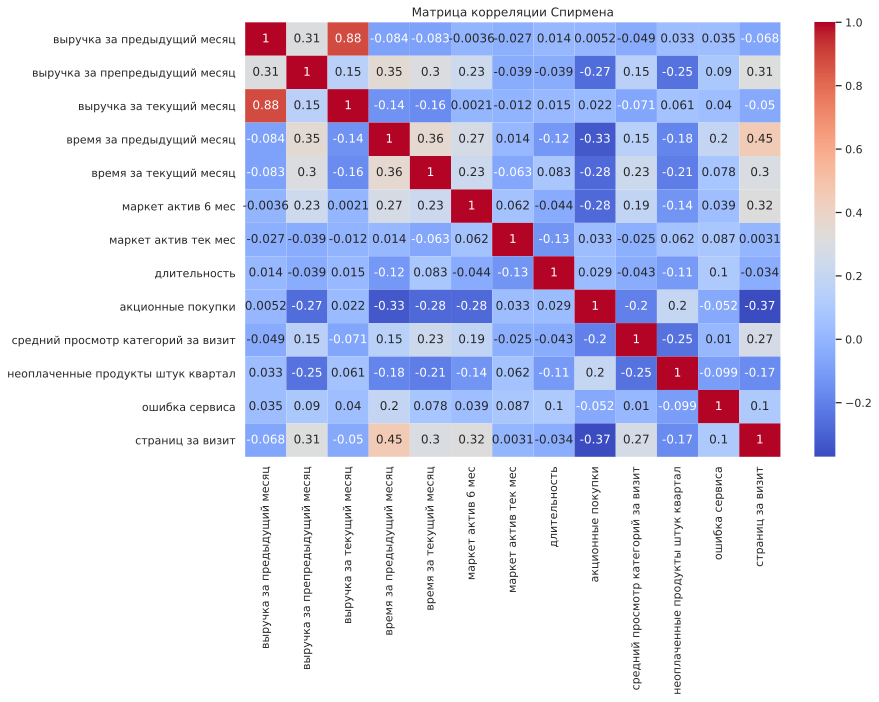

In [39]:
# Вычисляем матрицу корреляции
correlation_matrix = numeric_columns.corr(method='spearman')
# Визуализируем матрицу корреляции
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции Спирмена')
plt.show()

Больше всего подозрения вызывает значения корреляции Спирмена между выручкой за предыдущий месяц и выручкой за текущий месяц. Посмотрим, что покажут другие методы расчета корреляции

In [40]:
correlation_matrix['выручка за предыдущий месяц'].corr(correlation_matrix['выручка за текущий месяц'])

0.9806728503186233

In [41]:
corr, p_value = kendalltau(correlation_matrix['выручка за предыдущий месяц'], correlation_matrix['выручка за текущий месяц'])
print("Корреляция методом Кендалла:", corr)
print("P-значение:", p_value)

Корреляция методом Кендалла: 0.8717948717948716
P-значение: 1.8079271551493775e-06


Значения оказались большими. Хотя, между предпредыдущим и предыдущим месяцами слабая корреляция. Зависимость временеми за предыдущий месяц и текущий месяц тоже небольшая. Видимо, значения корреляций у таких признаков должны быть около 0.3, поэтому запомним данное отклонение от нормы так сказать. Возможно, в будущем мы объединим два столбца: выручка за предыдущий месяц и выручка за текущий месяц, чтобы улучшить результаты модели

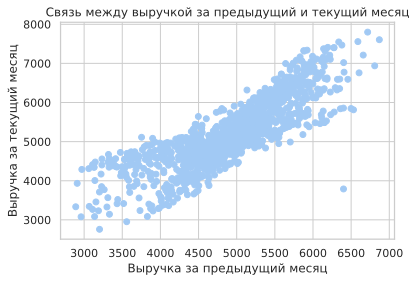

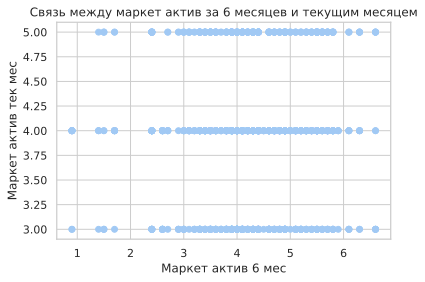

In [42]:
plt.scatter(market_qeneral['выручка за предыдущий месяц'], market_qeneral['выручка за текущий месяц'])
plt.xlabel('Выручка за предыдущий месяц')
plt.ylabel('Выручка за текущий месяц')
plt.title('Связь между выручкой за предыдущий и текущий месяц')
plt.show()
plt.scatter(market_qeneral['маркет актив 6 мес'], market_qeneral['маркет актив тек мес'])
plt.xlabel('Маркет актив 6 мес')
plt.ylabel('Маркет актив тек мес')
plt.title('Связь между маркет актив за 6 месяцев и текущим месяцем')
plt.show()

На графике отношения маркет актив тек месяца и за 6 месяцев видно, что в тек месяце есть всего три значения из-за чего трудно определить зависимость данных

На данном шаге мы с помощью матрицы корреляции по методу Спирмена проверили входные данные на зависимость между друг другом. Подозрительными признаками стали выручка за предыдущий и текущий месяцы, т.к. у них достаточно высокое значение корреляции. Это можно считать мультиколлинеарностью, поэтому потом попробуем создать пайплайн отдельно с соединенными столбцами. Помимо этого мы посмотрели на график рассеяния некоторых других признаков. На графике зависимости актив тек мес и 6 мес из-за слишком маленького диапозона целых чисел у тек мес зависимости практически не видно, но у нас категориальный целевой признак, поэтому это не особо важно

## Создание пайплайнов

На данном шаге наша цель создать пайплайн, который упростит наш код и может использоваться для таких моделей: линейная регрессия, логистическая регрессия, метод опорных векторов SVM, метод KNN и дерево решений. Линейная регрессия, скорее всего покажет плохой результат, поэтому не будем ее использовать. Остальные модели должны хорошо показать себя

In [43]:
market_qeneral = market_qeneral.set_index('id')

Для начала разделим данные на входные и целевые, разделим их на тренировочные и тестовые выборки

In [44]:
RANDOM_STATE = 42
TEST_SIZE = 0.25
X = market_qeneral.drop(['покупательская активность'], axis = 1)
y = market_qeneral['покупательская активность']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state = RANDOM_STATE, stratify = market_qeneral['покупательская активность'])
print(X_train.shape, X_test.shape,  y_train.shape, y_test.shape)

(972, 16) (324, 16) (972,) (324,)


Теперь создадим списки со столбцами для масштабирования и кодирования. Разделим на категориальные и числовые признаки

In [45]:
num_columns = numeric_columns.columns # можно взять из датасета, который мы использовали для матррицы корреляции
print(num_columns)
ohe_columns = ['тип сервиса', 'разрешить сообщать', 'популярная категория']

Index(['выручка за предыдущий месяц', 'выручка за препредыдущий месяц',
       'выручка за текущий месяц', 'время за предыдущий месяц',
       'время за текущий месяц', 'маркет актив 6 мес', 'маркет актив тек мес',
       'длительность', 'акционные покупки',
       'средний просмотр категорий за визит',
       'неоплаченные продукты штук квартал', 'ошибка сервиса',
       'страниц за визит'],
      dtype='object')


Создаем пайплайн преобразования категориальных признаков. После этого создаем data_preprocessor, в котором будет все масштабирование. Кладем это все в pipe_final. В переменной param_grid будем хранить переборы вариантов моделей с различными гиперпараметрами

In [46]:
y_train.head()

id
215858    Прежний уровень
215361          Снизилась
215884    Прежний уровень
216564    Прежний уровень
215715          Снизилась
Name: покупательская активность, dtype: object

In [47]:
# код ревьюера

# ohe_pipe = Pipeline(
#     [
#         ('simpleImputer_ohe', SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')), # Замена на самое частое значение
#         ('ohe', OneHotEncoder(drop = 'first')) # игнор неизвестных категорий
#     ]
# )



ohe_pipe = Pipeline(
    [
        ('ohe', OneHotEncoder(drop = 'first')) # игнор неизвестных категорий
    ]
)



data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('num', MinMaxScaler(), num_columns)
    ],
    remainder = 'passthrough'
)
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state = RANDOM_STATE))
    ]
)
param_grid = [
        # Модель SVC
    {
        'models' : [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__kernel' : ['linear', 'rbf', 'sigmoid', 'poly'],
        'models__degree' : range(1, 5),
        'models__gamma' : np.arange(0.1, 2, 0.5), 
        'models__C' : np.arange(0.1, 2, 0.5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
        # Модель LogisticRegression()
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, solver='saga', penalty='l1')], # тк есть l1, то добавить нужно solver='saga'
        'models__C': range(1, 5), # перебирает сложность модели от слабой до сильной
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },

    
        # Модель KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5), # кол-во соседей
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },
        # Модель DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5), # глубина дерева
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }

]


In [48]:
# проверим тренировочную и тестовую выборки на баланс классов
print(len(y_train[y_train == 'Прежний уровень']))
print(len(y_train[y_train == 'Снизилась']))
print()
print(len(y_test[y_test == 'Прежний уровень']))
print(len(y_test[y_test == 'Снизилась']))

601
371

201
123


Получается, что классы различаются практически в два раза, а это говорит о дисбалансе

И теперь с помощью случайного перебора параметров найдем лучшую метрику и модель соотвественно. Определять качество модели будем с помощью f1_micro, т.к. у нас есть дисбаланс бинарного категориального целевой признака. Помимо этого, нам будет полезно узнать точность и полноту предсказаний нашей модели

In [49]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='f1_micro',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['тип сервиса',
                                                   'разрешить сообщать',
                                                   'популярная категория']),
                                                 ('num', StandardScaler(),
                                                  Index(['выручка за предыдущий месяц', 'выручка за препредыдущий месяц',
       'выручка за текущий месяц', 'время за предыдущий месяц',
       'время за текущий месяц', 'маркет актив 6 мес', 'маркет актив тек мес',
       'длительность', 'акционные покупки',
       'средний просмотр категорий за визит',

Самой лучшей моделью оказалась SVC с такими параметрами: C=1.1, degree=2, gamma=1.1, kernel='linear',  probability=True, random_state=42. Ее метрика f1_micro = 0.87, что достаточно много.

Проверим нашу модель на тестовой выборке, вдруг она переобучилась

In [50]:
pred = randomized_search.predict(X_test) 
print(f"Метрика на тестовой выборке: {f1_score(y_test, pred, average='micro')}")

Метрика на тестовой выборке: 0.9197530864197531


Результаты оказались даже немного лучше, чем были

На данном шаге мы создали пайплайн, который помог нам найти самую оптимальную модель с лучшими для нее гиперпараметрами. Масштабирование было произведено с помощью StandardScaler(), MinMaxScaler() - для количественных переменных и OneHotEncoder() для категориальных. Перед кодированием категориальных признаков мы заполнили возможные пропуски самыми частыми значениями, чтобы не возникло проблем. Из 4 возможным моделей: DecisionTreeClassifier, KNeighborsClassifier, LogisticRegression, SVC с самым большим значением метрики(0.87) оказалась модель SVC с такими параметрами: C=1.1, degree=2, gamma=1.1, kernel='linear',  probability=True, random_state=42. На тестовых данных модель проявила себя еще лучше, показав значение метрики около 0.92

## Анализ важности признаков

На данном шаге мы с помощью метода SHAP посмотрим на важность признаков и сделаем выводы

In [51]:
# С помощью .named_steps получим доступ к контейнеру пайплайна
X_train_2 = pipe_final.named_steps['preprocessor'].fit_transform(X_train)
explainer = shap.LinearExplainer(randomized_search.best_estimator_.named_steps['models'], X_train_2)
print(X_train_2.shape)
explainer.expected_value

(972, 20)


-1.3333819371122462

In [52]:
randomized_search.best_estimator_.named_steps['models']

SVC(C=1.1, degree=2, gamma=1.1, kernel='linear', probability=True,
    random_state=42)

In [53]:
import sklearn
sklearn.__version__

'1.4.1.post1'

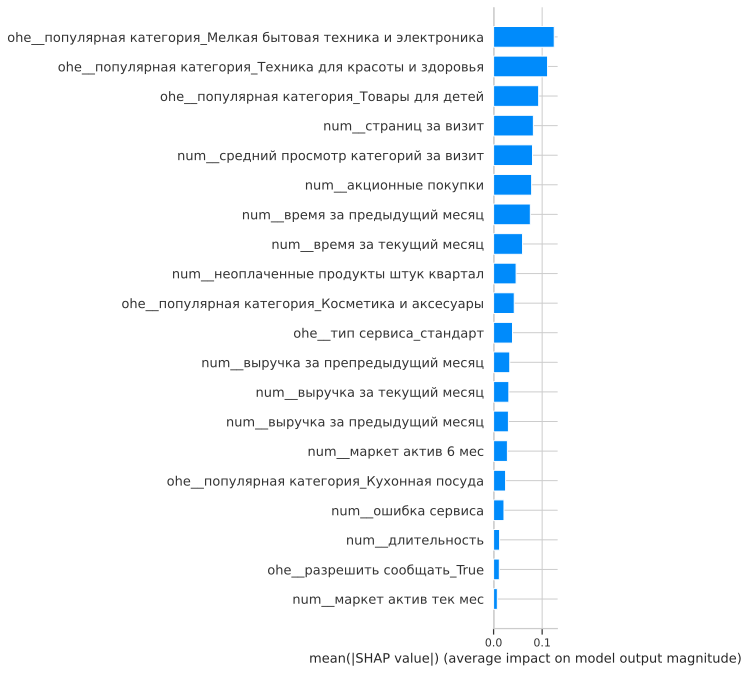

In [54]:
shap.summary_plot(explainer.shap_values(X_train_2), X_train_2, plot_type="bar",
                  feature_names=pipe_final.named_steps['preprocessor'].get_feature_names_out())

По данному графику видно, что столбец Популярная_категория, который после OneHotEncoder разделился на три: мелкая бытовая техника и электроника, техника для красоты и здоровья, товары для детей стал самым значимым для предсказания покупательской активности. Немного меньше на предсказание целевого признака повлияли столбцы: страниц за визит, средний просмотр категорий за визит, акционные покупки и время за текущий месяц. Самые незначительные признаки нашей модельки оказались: маркет актив тек мес, разрешить сообщать_True и длительность. Все оставшиеся признаки оказывают влияние.  
С помощью данной информации можно сделать вывод, что для при создании модели можно не учитывать такие признаки, как: маркет актив тек мес, разрешить сообщать_True и длительность, т.к. они только усложняют модель. Помимо этого, данные наблюдения могут помочь в принятии бизнес-решений. Зная какие признаки сильнее влияют на покупательскую активность, можно уделить им больше внимания, чтобы сохранить покупателей

## Сегментация покупателей

На данном этапе нам нужно будет выполнить сегментацию покупателей, используя результаты нашей модели и данные о прибыльности покупателей из таблицы money. Для некоторых групп покупателей сделаем предложение по увеличению покупательской активности

Сегментация -  это процессу разделения данных или наблюдений на различные группы, основываясь по определенным схожим характеристикам. С помощью предсказания вероятности покупательской активности клиентов и их среднемесячной прибыли за последние три месяца нужно разделить покупателей на группы со схожими признаками

Нужно сделать полную таблицу со всеми признаками. Для этого нужно добавить к датафрейму X_test два новвых столбца: вер покуп акт и прибыль. Чтобы это можно было сделать нужно из индексов сделать id

Начнем с подготовки к присоединению столбца вероятностью покупательской активности

In [55]:
pred = randomized_search.predict(X_test)
pred_prob = randomized_search.predict_proba(X_test)
display(pred_prob[0:5, 0])
print(len(pred_prob))
pred_prob = pred_prob[:, 0]
print()
display(pred[0:5])
print(len(pred))

pred_prob = pd.DataFrame(data = pred_prob, columns =  ['вер покуп акт']) # вероятность покупательской активности
print(len(pred_prob))
pred_prob.head()

array([0.9820308 , 0.01556839, 0.90652448, 0.17379026, 0.37533667])

324



array(['Прежний уровень', 'Снизилась', 'Прежний уровень', 'Снизилась',
       'Снизилась'], dtype=object)

324
324


,вер покуп акт
0,0.982031
1,0.015568
2,0.906524
3,0.173790
4,0.375337


Получается, что мы отобрали столбики с вероятностью того, что прежний уровень останется. Если больше 0.5, то прежний уровень, иначе - активность снизилась. Сделали из массива датафрейм, чтобы потом можно было объединить таблицы. Это мы сейчас и будем делать

In [56]:
X_test_new = X_test.reset_index(inplace=True)
market_qeneral_2 = X_test.merge(pred_prob, left_index=True, right_index=True)
market_qeneral_2.head()

,id,выручка за предыдущий месяц,выручка за препредыдущий месяц,выручка за текущий месяц,время за предыдущий месяц,время за текущий месяц,тип сервиса,разрешить сообщать,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,популярная категория,средний просмотр категорий за визит,неоплаченные продукты штук квартал,ошибка сервиса,страниц за визит,вер покуп акт
0,216161,3973.0,4912.0,3289.2,16,17,стандарт,True,4.1,4,606,0.15,Техника для красоты и здоровья,6,1,4,12,0.982031
1,215654,3548.0,4656.0,4170.7,11,9,премиум,False,1.4,4,684,0.94,Товары для детей,3,6,1,6,0.015568
2,216307,5444.0,4565.0,6335.8,20,11,премиум,True,3.3,4,488,0.13,Домашний текстиль,4,2,8,10,0.906524
3,215501,6604.0,4993.0,6758.7,9,9,премиум,True,3.5,3,1057,0.35,Домашний текстиль,4,3,5,6,0.173790
4,215934,5090.0,4451.0,5773.8,15,18,стандарт,False,5.5,4,147,0.99,Мелкая бытовая техника и электроника,1,2,3,7,0.375337


Остался последний шаг для создания общей таблицы. Это объединить money и market_qeneral_2

In [57]:
market_qeneral_2 = market_qeneral_2.merge(money, on = 'id', how = 'left')
market_qeneral_2.head()

,id,выручка за предыдущий месяц,выручка за препредыдущий месяц,выручка за текущий месяц,время за предыдущий месяц,время за текущий месяц,тип сервиса,разрешить сообщать,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,популярная категория,средний просмотр категорий за визит,неоплаченные продукты штук квартал,ошибка сервиса,страниц за визит,вер покуп акт,прибыль
0,216161,3973.0,4912.0,3289.2,16,17,стандарт,True,4.1,4,606,0.15,Техника для красоты и здоровья,6,1,4,12,0.982031,4.69
1,215654,3548.0,4656.0,4170.7,11,9,премиум,False,1.4,4,684,0.94,Товары для детей,3,6,1,6,0.015568,2.75
2,216307,5444.0,4565.0,6335.8,20,11,премиум,True,3.3,4,488,0.13,Домашний текстиль,4,2,8,10,0.906524,3.16
3,215501,6604.0,4993.0,6758.7,9,9,премиум,True,3.5,3,1057,0.35,Домашний текстиль,4,3,5,6,0.173790,3.74
4,215934,5090.0,4451.0,5773.8,15,18,стандарт,False,5.5,4,147,0.99,Мелкая бытовая техника и электроника,1,2,3,7,0.375337,4.40


Произведем сегментацию с помощью графика scatter по признакам вероятность покупательской активности и прибыль

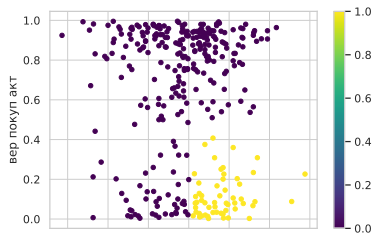

In [58]:
market_qeneral_2['segment'] = (market_qeneral_2['вер покуп акт'] < 0.5) & (market_qeneral_2['прибыль'] > 4.0)

# c задает цвет каждой точки
market_qeneral_2.plot(x='прибыль', y='вер покуп акт', kind='scatter', c=market_qeneral_2['segment'], cmap='viridis') 
plt.show()

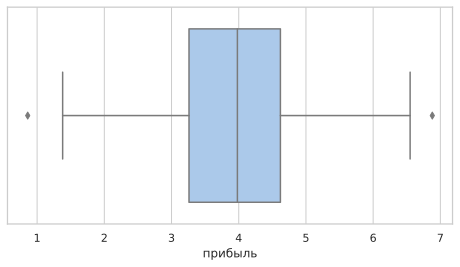

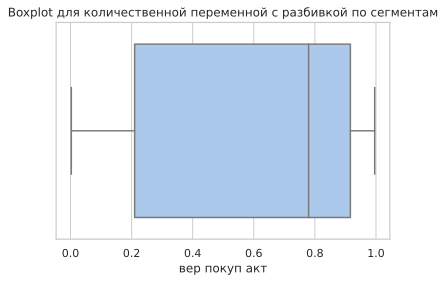

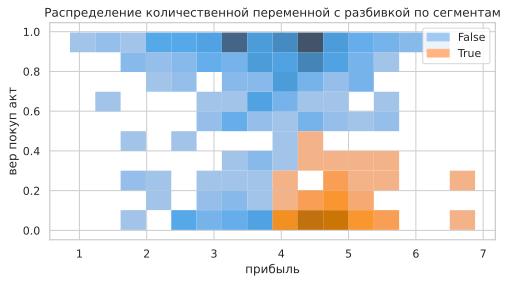

In [59]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=market_qeneral_2, x='прибыль')
plt.show()
sns.boxplot(data=market_qeneral_2, x='вер покуп акт')
plt.title('Boxplot для количественной переменной с разбивкой по сегментам')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(data=market_qeneral_2, x='прибыль', y='вер покуп акт', hue = (market_qeneral_2['вер покуп акт'] < 0.5) & (market_qeneral_2['прибыль'] > 4.0),  kde=True)
plt.title('Распределение количественной переменной с разбивкой по сегментам')
plt.show()

По данным графикам можно выделить 3 группы:  
- вер пок акт < 0.5 и прибыль < 4  покупатели, которые дают мало прибыли, а значит мало покупают. Будет достаточно сложно их чем-то заинтересовать  
- вер пок акт < 0.5 и прибыль > 4  покупатели, которые приносят достаточно много прибыли, но по каким-либо причинам их активность может снизиться. Таких клиентов будет легче чем-то привлечь  
- вер пок акт > 0.5 и любая прибыль такие покупатели нас уже не интересуют

Из данных групп можно выделить вторую, где вер пок акт < 0.5 и прибыль > 4. В ней находятся клиенты, которых будет легче всего сохранить, т.к. они дают дают прибыль компании, а значит что-то покупают. Возможно, им просто что-то не нравится. Сейчас с этим и разберемся

In [60]:
segmentation = market_qeneral_2[(market_qeneral_2['прибыль'] > 4) & (market_qeneral_2['вер покуп акт'] < 0.5)]
print(segmentation.shape)
display(segmentation.head())
# market_qeneral_2.query('прибыль > 4 and вер покуп акт < 0.5')  не пашет

(56, 20)


,id,выручка за предыдущий месяц,выручка за препредыдущий месяц,выручка за текущий месяц,время за предыдущий месяц,время за текущий месяц,тип сервиса,разрешить сообщать,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,популярная категория,средний просмотр категорий за визит,неоплаченные продукты штук квартал,ошибка сервиса,страниц за визит,вер покуп акт,прибыль,segment
4,215934,5090.0,4451.0,5773.8,15,18,стандарт,False,5.5,4,147,0.99,Мелкая бытовая техника и электроника,1,2,3,7,0.375337,4.40,True
12,215375,5253.5,4715.0,5633.1,8,9,премиум,True,3.0,4,558,0.89,Товары для детей,3,3,7,4,0.034931,4.18,True
18,215452,4045.0,4963.0,4206.2,11,10,стандарт,True,3.8,4,756,0.90,Товары для детей,2,3,6,4,0.058730,4.50,True
21,215484,5059.0,4267.0,5018.7,5,7,премиум,False,2.9,5,448,0.23,Товары для детей,4,2,6,3,0.087343,5.64,True
38,215496,5020.0,4896.0,5237.1,11,11,премиум,True,4.0,4,684,0.40,Техника для красоты и здоровья,1,6,2,4,0.083025,4.64,True


In [61]:
segmentation['популярная категория'].unique()

array(['Мелкая бытовая техника и электроника', 'Товары для детей',
       'Техника для красоты и здоровья', 'Косметика и аксесуары',
       'Кухонная посуда', 'Домашний текстиль'], dtype=object)

In [62]:
segmentation.describe()

,id,выручка за предыдущий месяц,выручка за препредыдущий месяц,выручка за текущий месяц,время за предыдущий месяц,время за текущий месяц,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,средний просмотр категорий за визит,неоплаченные продукты штук квартал,ошибка сервиса,страниц за визит,вер покуп акт,прибыль
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,215570.857143,5037.928571,4631.428571,5324.392857,9.714286,9.928571,3.444643,4.035714,603.482143,0.536964,2.660714,4.017857,3.750000,4.017857,0.115713,4.803750
std,159.876478,801.560339,215.205851,872.373216,2.681345,2.689083,1.035711,0.631428,251.078039,0.325732,1.148545,2.136191,1.918806,1.589638,0.103677,0.572873
min,215349.000000,2960.000000,4138.000000,3078.300000,5.000000,4.000000,0.900000,3.000000,147.000000,0.120000,1.000000,0.000000,0.000000,1.000000,0.002676,4.110000
25%,215449.750000,4435.750000,4487.750000,4785.775000,8.000000,8.000000,2.400000,4.000000,441.250000,0.280000,2.000000,2.000000,2.000000,3.000000,0.033952,4.320000
50%,215578.500000,5077.750000,4661.500000,5416.600000,10.000000,10.000000,3.500000,4.000000,672.500000,0.350000,3.000000,4.000000,3.000000,4.000000,0.082380,4.735000
75%,215655.500000,5625.625000,4760.500000,6062.275000,11.250000,11.000000,4.100000,4.000000,806.000000,0.930000,3.000000,5.000000,5.000000,5.000000,0.177037,5.100000
max,216115.000000,6291.500000,4990.000000,7063.000000,17.000000,18.000000,5.600000,5.000000,1007.000000,0.990000,6.000000,9.000000,8.000000,8.000000,0.407578,6.880000


In [63]:
kategory_analiz(segmentation)

тип сервиса
стандарт -  37
премиум -  19
отношение -  0.5135135135135135

разрешить сообщать
True -  42
False -  14
отношение -  0.3333333333333333

популярная категория
Мелкая бытовая техника и электроника -  6
Товары для детей 17
Техника для красоты и здоровья 5
Косметика и аксесуары 10
Кухонная посуда 7
Домашний текстиль 11


Чтобы можно было сравнить нашу таблицу с ожидаемыми значениями, нужно отобрать только тех из таблицы market_qeneral_2, у кого сохранится покупательская активность

Посмторим на такую же информацию по таблице market_qeneral_2_active и сравним их. В основном нас будет интересовать среднее значение

In [64]:
market_qeneral_2_active = market_qeneral_2[market_qeneral_2['вер покуп акт'] > 0.5]
market_qeneral_2_active.describe()

,id,выручка за предыдущий месяц,выручка за препредыдущий месяц,выручка за текущий месяц,время за предыдущий месяц,время за текущий месяц,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,средний просмотр категорий за визит,неоплаченные продукты штук квартал,ошибка сервиса,страниц за визит,вер покуп акт,прибыль
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,216205.976959,4867.679724,4911.811060,5173.287558,14.976959,14.529954,4.579724,3.958525,583.382488,0.228249,3.691244,2.262673,4.327189,10.055300,0.844384,3.894470
std,272.485294,652.514902,311.806024,800.987857,3.262359,4.216401,0.775286,0.661881,245.143753,0.134971,1.330402,1.430533,2.034164,3.397532,0.126076,0.987799
min,215355.000000,3155.000000,4346.000000,2952.200000,7.000000,4.000000,2.400000,3.000000,129.000000,0.110000,1.000000,0.000000,0.000000,4.000000,0.510019,0.860000
25%,215984.000000,4480.000000,4675.000000,4724.300000,13.000000,12.000000,4.000000,4.000000,401.000000,0.150000,3.000000,1.000000,3.000000,8.000000,0.778642,3.260000
50%,216232.000000,4931.000000,4912.000000,5142.300000,15.000000,14.000000,4.400000,4.000000,582.000000,0.210000,4.000000,2.000000,4.000000,10.000000,0.882977,3.950000
75%,216423.000000,5350.500000,5154.000000,5617.200000,17.000000,18.000000,5.200000,4.000000,784.000000,0.260000,5.000000,3.000000,6.000000,12.000000,0.940551,4.520000
max,216646.000000,6165.500000,5624.000000,7370.600000,22.000000,23.000000,6.600000,5.000000,1061.000000,0.950000,6.000000,5.000000,9.000000,20.000000,0.995802,6.170000


In [65]:
kategory_analiz(market_qeneral_2_active)

тип сервиса
стандарт -  163
премиум -  54
отношение -  0.3312883435582822

разрешить сообщать
True -  165
False -  52
отношение -  0.3151515151515151

популярная категория
Мелкая бытовая техника и электроника -  36
Товары для детей 49
Техника для красоты и здоровья 38
Косметика и аксесуары 36
Кухонная посуда 18
Домашний текстиль 40


В среднем у покупателей, с которыми мы работаем, тип сервиса премиум встречается чаще, как и товары категории для детей. С выручкой у segmentation все в порядке, а вот время, проведенное на сайте, в среднем меньше чем в market_qeneral_2_active. Еще, покупатели второго типа намного больше совершают акционных покупок, но меньше просматривают различных категорий за визит, в два раза больше не покупают продукты, находящиеся в корзине, намного меньше просматривают страниц за визит.  
Чтобы не потерять покупателей можно попробовать улучшить условия у типа сервиса - премиум, т.к. таких клиентов много. Еще нужно предлагать товары с акциями в таких видах товаров, как: мелкая бытовая техника и электроника и техника для красоты и здоровья, т.к. пользователи очень часто делают акционные покупки, а данные виды товаров они мало просматривают и покупают. Это может помочь увеличить категории покупок, а значит и саму активность. Данные пользователи держат много продуктов в корзине, видимо, ждут скидок. Можно делать небольшие скидки на позиции, которые долго лежат в корзине.

Рассмотрим еще один новый сегмент клиентов, которые покупают только технику, то есть товары с длинным жизненным циклом. Для этого из market_qeneral_2 отберем только тех людей, которые покупают различную технику. Данный сегмент содержит достаточно большую часть пользователей, поэтому его анализ будет актуален

In [66]:
tehnika = market_qeneral_2.query('`популярная категория` == "Мелкая бытовая техника и электроника" or `популярная категория` =="Техника для красоты и здоровья"')
tehnika.head()

,id,выручка за предыдущий месяц,выручка за препредыдущий месяц,выручка за текущий месяц,время за предыдущий месяц,время за текущий месяц,тип сервиса,разрешить сообщать,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,популярная категория,средний просмотр категорий за визит,неоплаченные продукты штук квартал,ошибка сервиса,страниц за визит,вер покуп акт,прибыль,segment
0,216161,3973.0,4912.0,3289.2,16,17,стандарт,True,4.1,4,606,0.15,Техника для красоты и здоровья,6,1,4,12,0.982031,4.69,False
4,215934,5090.0,4451.0,5773.8,15,18,стандарт,False,5.5,4,147,0.99,Мелкая бытовая техника и электроника,1,2,3,7,0.375337,4.40,True
6,216465,5505.5,5180.0,5917.6,18,15,стандарт,True,4.9,4,739,0.17,Мелкая бытовая техника и электроника,5,1,4,4,0.955046,2.30,False
7,216527,4668.0,5023.0,5106.1,12,19,стандарт,False,4.9,3,679,0.15,Техника для красоты и здоровья,4,1,1,14,0.974421,3.26,False
14,216063,4074.0,4479.0,4555.0,15,22,премиум,True,5.2,4,982,0.28,Техника для красоты и здоровья,2,2,4,12,0.929933,2.54,False


Выведем общую информацию о таблице и потом сравним с market_qeneral_2_active

In [67]:
tehnika.describe()

,id,выручка за предыдущий месяц,выручка за препредыдущий месяц,выручка за текущий месяц,время за предыдущий месяц,время за текущий месяц,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,средний просмотр категорий за визит,неоплаченные продукты штук квартал,ошибка сервиса,страниц за визит,вер покуп акт,прибыль
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,216089.913978,4826.661290,4846.645161,5173.048387,13.795699,13.892473,4.434409,4.032258,609.150538,0.314839,3.397849,2.172043,4.225806,8.655914,0.737288,3.849785
std,344.638836,713.567945,316.321955,810.777914,3.561751,4.451337,0.883975,0.633342,237.135393,0.251135,1.360465,1.652558,2.016934,3.774902,0.298552,1.123535
min,215365.000000,3067.000000,4165.000000,3289.200000,5.000000,4.000000,1.700000,3.000000,147.000000,0.110000,1.000000,0.000000,0.000000,1.000000,0.019800,0.860000
25%,215837.000000,4403.000000,4588.000000,4681.400000,11.000000,11.000000,3.900000,4.000000,433.000000,0.160000,2.000000,1.000000,3.000000,6.000000,0.606955,3.150000
50%,216113.000000,4900.000000,4868.000000,5224.600000,14.000000,14.000000,4.300000,4.000000,624.000000,0.240000,3.000000,2.000000,4.000000,9.000000,0.881221,3.990000
75%,216386.000000,5309.500000,5042.000000,5682.800000,16.000000,17.000000,5.100000,4.000000,801.000000,0.300000,4.000000,3.000000,6.000000,11.000000,0.947198,4.620000
max,216646.000000,6351.000000,5474.000000,7338.200000,22.000000,22.000000,6.300000,5.000000,1061.000000,0.990000,6.000000,10.000000,8.000000,19.000000,0.992968,6.170000


In [68]:
kategory_analiz(tehnika)

тип сервиса
стандарт -  70
премиум -  23
отношение -  0.32857142857142857

разрешить сообщать
True -  70
False -  23
отношение -  0.32857142857142857

популярная категория
Мелкая бытовая техника и электроника -  45
Товары для детей 0
Техника для красоты и здоровья 48
Косметика и аксесуары 0
Кухонная посуда 0
Домашний текстиль 0


In [69]:
market_qeneral_2_active.describe()

,id,выручка за предыдущий месяц,выручка за препредыдущий месяц,выручка за текущий месяц,время за предыдущий месяц,время за текущий месяц,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,средний просмотр категорий за визит,неоплаченные продукты штук квартал,ошибка сервиса,страниц за визит,вер покуп акт,прибыль
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,216205.976959,4867.679724,4911.811060,5173.287558,14.976959,14.529954,4.579724,3.958525,583.382488,0.228249,3.691244,2.262673,4.327189,10.055300,0.844384,3.894470
std,272.485294,652.514902,311.806024,800.987857,3.262359,4.216401,0.775286,0.661881,245.143753,0.134971,1.330402,1.430533,2.034164,3.397532,0.126076,0.987799
min,215355.000000,3155.000000,4346.000000,2952.200000,7.000000,4.000000,2.400000,3.000000,129.000000,0.110000,1.000000,0.000000,0.000000,4.000000,0.510019,0.860000
25%,215984.000000,4480.000000,4675.000000,4724.300000,13.000000,12.000000,4.000000,4.000000,401.000000,0.150000,3.000000,1.000000,3.000000,8.000000,0.778642,3.260000
50%,216232.000000,4931.000000,4912.000000,5142.300000,15.000000,14.000000,4.400000,4.000000,582.000000,0.210000,4.000000,2.000000,4.000000,10.000000,0.882977,3.950000
75%,216423.000000,5350.500000,5154.000000,5617.200000,17.000000,18.000000,5.200000,4.000000,784.000000,0.260000,5.000000,3.000000,6.000000,12.000000,0.940551,4.520000
max,216646.000000,6165.500000,5624.000000,7370.600000,22.000000,23.000000,6.600000,5.000000,1061.000000,0.950000,6.000000,5.000000,9.000000,20.000000,0.995802,6.170000


In [70]:
kategory_analiz(market_qeneral_2_active)

тип сервиса
стандарт -  163
премиум -  54
отношение -  0.3312883435582822

разрешить сообщать
True -  165
False -  52
отношение -  0.3151515151515151

популярная категория
Мелкая бытовая техника и электроника -  36
Товары для детей 49
Техника для красоты и здоровья 38
Косметика и аксесуары 36
Кухонная посуда 18
Домашний текстиль 40


Категориальные признаки у двух таблиц практически не отличаются. Как всегда нас интересует больше всего строчка со средними показателями. Выручки одинаковые, время на сайте в среднем меньше, что достаточно логично. Пользователи, которые покупают в основном технику, чаще покупают технику по скидке, меньше просматривают категорий и страниц за визит.  

По этим данным можно сказать, что пользователи данного сегмента проводят мало времени на сайте. Они часто покупают товары по скидке, что может уменьшать доход, т.к. клиенты, которым нужна техника, просто должны будут ее купить, несмотря на различные скидки. Поэтому можно уменьшить или убрать скидки. Прибыль можно увеличить еще с помощью расширения категорий товаров у пользователя, предлагая ему при покупке техники различные расходники, без которых их основной товар будет бесполезным. Например: клиент заказывает кофемашину. Ему сайт должен предложить сам кофе. Таким образом, покупатель может узнать, что на данном сайте можно покупать не только технику, но и продукты.

## Итоги проекта

В данном проекте мы попытались помочь интернет-магазину "В один клик", который занимается продажей товаров таких категорий, как: 'Мелкая бытовая техника и электроника', 'Товары для детей',  'Техника для красоты и здоровья', 'Косметика и аксесуары'   'Кухонная посуда', 'Домашний текстил, сохранить клиентов, начинающих терять покупательскую активность. В этом нам помогли персонализированные предложения для различных сегментов покупателей. Для этого пришлось создать модель, которая могла предсказывать вероятность активности клиента в ближайшее время.
- **Загрузка данных** Мы открыли и поверхностно изучили четрые таблицы. market_money - таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом. market_money - таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом. иод
market_time - Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение пе.  минутах
money - Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому . Сделали пробелы вместо ; между признаками и заменили , на . у десятичных чисел.
-  **Предобработка данных** На данном шаге мы переименовали столбцы и привели их к нижнему регистру у таблицы market и заменили _ на пробелы.
В таблицах market_money и market_time поменяем _ тоже на пробел. Изменили тип данных у столбца "Разрешить сообщать" таблицы market на bool. В таблице money поменяли тип данных у "прибыль" на float. Пропусков не было обнаружено в отличие от дубликатов, от которых мы и избавились. Нашли и заменилиопечатки в данных.
- **Исследовательский анализ** Тут мы провели исследовательский анализ данных из каждой таблицы. Изучили все данные на наличие различных выбросов. В таблице market_money столбец 'выручка' оказался с достаточно спорным выбросом, который пришлось убрать, на всякий случай. Было замечено достаточно странное измерение прибыли в процентах. В конце шага отобрали клиентов с покупательской активностью не менее трёх месяцев. Такими оказались все клиенты, кроме 33
- **Объединение таблиц** Мы объединили между собой три таблицы market, market_money, market_time, где разделили столбцы, отвечающие за выручку и время, по месяцам.
- **Корреляционные анализ** На данном шаге мы построили матрицу корреляий, в которой корреляция значений выручки столбцов между текущим и предыдущим месяцами  оказались большой. Хотя, между предпредыдущим и предыдущим месяцами слабая корреляция. Зависимость времени за предыдущий месяц и текущий тоже небольшая. В дальнейшем это не пригодилось.
- **Создание пайплайна** В этом шаге мы создали пайплайн, который помог нам найти самую оптимальную модель с лучшими для нее гиперпараметрами. Масштабирование было произведено с помощью StandardScaler(), MinMaxScaler() - для количественных переменных и OneHotEncoder() для категориальных. Перед кодированием категориальных признаков мы заполнили возможные пропуски самыми частыми значениями, чтобы не возникло проблем. Из 4 возможных моделей: DecisionTreeClassifier, KNeighborsClassifier, LogisticRegression, SVC с самым большим значением метрики f1_micro (0.87) оказалась модель SVC с такими параметрами: C=1.1, degree=2, gamma=1.1, kernel='linear', probability=True, random_state=42.
- **Анализ важности признаков** Оценили важность признаков для лучшей модели и построили график важности с помощью метода SHAP. По графику получились такие выводы: столбец Популярная_категория, который после OneHotEncoder разделился на три: мелкая бытовая техника и электроника, техника для красоты и здоровья, товары для детей стал самым значимым для предсказания покупательской активности. Немного меньше на предсказание целевого признака повлияли столбцы: страниц за визит, средний просмотр категорий за визит, акционные покупки и время за текущий месяц. Самые незначительные признаки нашей модельки оказались: маркет актив тек мес, разрешить сообщать_True и длительность. Все оставшиеся признаки оказывают влияние.
- **Сегментация покупателей** Используя результаты моделирования и данные о прибыльности покупателей, выполнили сегментацию покупателей. После этого провели анализ одного из типов. Это оказались данные с вероятностью покупвательской активности < 0.5 и прибылью > 4. Эти данные мы сравнивали со всеми, где вер пок акт была > 0.5, то есть это были покупатели, о которых мечтает магазин. Чтобы не потерять покупателей можно попробовать улучшить условия у типа сервиса - премиум, т.к. таких клиентов много. Еще нужно предлагать товары с акциями в таких видах товаров, как: мелкая бытовая техника и электроника и техника для красоты и здоровья, т.к. пользователи очень часто делают акционные покупки, а данные виды товаров они мало просматривают и покупают. Это может помочь увеличить категории покупок, а значит и саму активность. Данные пользователи держат много продуктов в корзине, видимо, ждут скидок. Можно делать небольшие скидки на позиции, которые долго лежат в корзине. Потом рассмотрели еще один новый сегмент клиентов, которые покупают только технику, то есть товары с длинным жизненным циклом. Для этого из market_qeneral_2 отберем только тех людей, которые покупают различную технику. И сравним, как в прошлом анализе с желаемыми результатами. Получилось, что пользователи данного сегмента проводят мало времени на сайте. Они часто покупают товары по скидке, что может уменьшать доход, т.к. клиенты, которым нужна техника, просто должны будут ее купить, несмотря на различные скидки. Поэтому можно уменьшить или убрать скидки. Прибыль можно увеличить еще с помощью расширения категорий товаров у пользователя, предлагая ему при покупке техники различные расходники, без которых их основной товар будет бесполезным.
Данные советы, подтвержденные анализом данных, должны будут помочь сохранить интернет-магазину "В один клик" клиентов.:ычение прибыли